In [10]:
import tifffile
import math
import numpy as np
import ComputeGaussianPSF as CG

import matplotlib.pyplot as plt

In [11]:
filepath = 'E:\\Code\\OTF_SIMULATION\\'
filename = 'single_bead_r1_513volog_otf_modulated-16bit_redux-trim.tif' #don't include .tif suffix
my_im = tifffile.imread(filepath + filename)


TiffPage 0: TypeError: read_bytes() missing 3 required positional arguments: 'dtype', 'count', and 'offsetsize'


In [12]:

print(my_im.shape)
dims = my_im.shape
print(dims[0])
print(dims[1])
print(dims[2])
# a = (np.zeros_like(my_im)).astype(np.uint16)
#print(a.shape)
offset = 0
# for i in range(15):
#     for j in range(4):
#         a[i + j*15,:,:] = my_im[i + j*15,:,:]



# a = np.reshape(my_im,(dims[0]//15,3,5,dims[1],dims[2]))

b = (np.zeros((dims[0]//2,dims[1],dims[2]),dtype = np.uint16)).astype(np.uint16)
print(b.shape)

for i in range((dims[0]//15)//2):
    print(2*i*15)
    for j in range(15):
        b[i*15 + j,:,:] = my_im[2*i*15 + j,:,:]


# plt.imshow(a[2,0,1]) 
#outpath = '/run/media/imaging/Elmo_Pro/SIM_Data/2022_June_SIM_data/Max_SIM_rig/220621_psf/bead_100nm_16p6aotf_65nmstep_4umrange_3dsim_1/'
# with tifffile.TiffWriter('temp.tif') as tif:
#   for i in range(4):
#     filename = f"image_{i}"
#     img = np.random.randint(0, 1023, (256, 256), 'uint16')
#     tif.save(img, photometric='minisblack', description=filename)
tifffile.imwrite(filepath + filename[0:len(filename) - 4] + '_reduced_stack.tif', b)


(2550, 256, 256)
2550
256
256
(1275, 256, 256)
0
30
60
90
120
150
180
210
240
270
300
330
360
390
420
450
480
510
540
570
600
630
660
690
720
750
780
810
840
870
900
930
960
990
1020
1050
1080
1110
1140
1170
1200
1230
1260
1290
1320
1350
1380
1410
1440
1470
1500
1530
1560
1590
1620
1650
1680
1710
1740
1770
1800
1830
1860
1890
1920
1950
1980
2010
2040
2070
2100
2130
2160
2190
2220
2250
2280
2310
2340
2370
2400
2430
2460
2490
2520


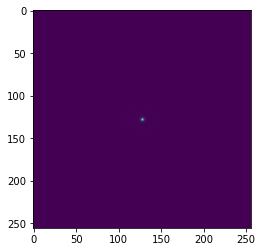

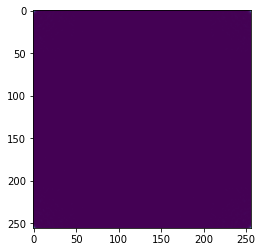

In [13]:
im_fft = np.fft.fft2(my_im[0,:,:])
im_fft_shft = np.fft.fftshift(im_fft)
# im_fft = np.fft.fftshift(my_im)
plt.imshow(np.abs(im_fft_shft))
plt.figure(2)
plt.imshow(np.abs(im_fft))